## Herein is an analysis of the Data on the daily number of new reported COVID-19 cases and deaths by EU/EEA country.  The data was downloaded from the European Centre for Disease Prevention and Control, an Agency of the European Union

In [1]:
#Data source = https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country

## The purpose of this study is to reveal the magnitude of the effect Covid-19 virus has had in the EU countries

### The first step in our analysis is to import the downloaded data (as shown below) using Pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [3]:
pd.read_csv('./downloads/Covid19.csv')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,18/07/2022,18,7,2022,11862.0,5.0,Austria,AT,AUT,8901064,Europe
1,17/07/2022,17,7,2022,8362.0,8.0,Austria,AT,AUT,8901064,Europe
2,16/07/2022,16,7,2022,10368.0,4.0,Austria,AT,AUT,8901064,Europe
3,15/07/2022,15,7,2022,12332.0,7.0,Austria,AT,AUT,8901064,Europe
4,14/07/2022,14,7,2022,13205.0,2.0,Austria,AT,AUT,8901064,Europe
...,...,...,...,...,...,...,...,...,...,...,...
26034,08/02/2020,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
26035,07/02/2020,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
26036,06/02/2020,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
26037,05/02/2020,5,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe


In [4]:
Covid = pd.read_csv('./downloads/Covid19.csv')

## DATA CLEANING

In [5]:
#lets start by cleaning the data and getting rid of information we do not need
Covid.drop(columns=["geoId", "continentExp"], inplace=True)

In [6]:
Covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2020
0,18/07/2022,18,7,2022,11862.0,5.0,Austria,AUT,8901064
1,17/07/2022,17,7,2022,8362.0,8.0,Austria,AUT,8901064
2,16/07/2022,16,7,2022,10368.0,4.0,Austria,AUT,8901064
3,15/07/2022,15,7,2022,12332.0,7.0,Austria,AUT,8901064
4,14/07/2022,14,7,2022,13205.0,2.0,Austria,AUT,8901064
...,...,...,...,...,...,...,...,...,...
26034,08/02/2020,8,2,2020,0.0,0.0,Sweden,SWE,10327589
26035,07/02/2020,7,2,2020,0.0,0.0,Sweden,SWE,10327589
26036,06/02/2020,6,2,2020,0.0,0.0,Sweden,SWE,10327589
26037,05/02/2020,5,2,2020,0.0,0.0,Sweden,SWE,10327589


## Next Step: It is important for us to know the number of people who recovered from the virus and the rate at which people died. For that reason, we would calculate the number of survivors and the death rate per day and add the data to our existing dataset

In [7]:
#We achieve this by adding new columns to the data we have 
Covid['survivors']= Covid.cases - Covid.deaths
Covid['deathRate%']=(Covid.deaths/Covid.cases)*100

In [8]:
Covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2020,survivors,deathRate%
0,18/07/2022,18,7,2022,11862.0,5.0,Austria,AUT,8901064,11857.0,0.042151
1,17/07/2022,17,7,2022,8362.0,8.0,Austria,AUT,8901064,8354.0,0.095671
2,16/07/2022,16,7,2022,10368.0,4.0,Austria,AUT,8901064,10364.0,0.038580
3,15/07/2022,15,7,2022,12332.0,7.0,Austria,AUT,8901064,12325.0,0.056763
4,14/07/2022,14,7,2022,13205.0,2.0,Austria,AUT,8901064,13203.0,0.015146
...,...,...,...,...,...,...,...,...,...,...,...
26034,08/02/2020,8,2,2020,0.0,0.0,Sweden,SWE,10327589,0.0,NaN
26035,07/02/2020,7,2,2020,0.0,0.0,Sweden,SWE,10327589,0.0,NaN
26036,06/02/2020,6,2,2020,0.0,0.0,Sweden,SWE,10327589,0.0,NaN
26037,05/02/2020,5,2,2020,0.0,0.0,Sweden,SWE,10327589,0.0,NaN


### Let's now get a general/yearly overview of our dataset

In [9]:
Yearly = Covid.groupby("year")[["cases", "deaths", "survivors"]].sum()

In [10]:
Yearly['deathRate%'] = (Covid.deaths/Covid.cases)*100

In [11]:
Yearly

,cases,deaths,survivors,deathRate%
year,,,,
2020,15747676.0,390891.0,15353715.0,4.300000
2021,41468331.0,526678.0,40922508.0,4.606320
2022,100346150.0,198562.0,100115860.0,2.848837


<AxesSubplot:title={'center':'Cases Distribution'}, xlabel='year', ylabel='cases'>

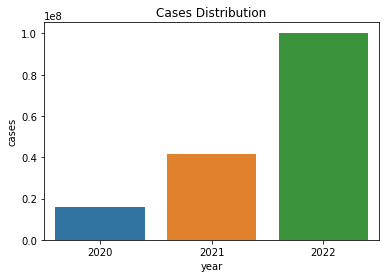

In [12]:
#In order for us to plot a relationship between the year and the other aggregates, we has to use the reset_index()
Graph= Yearly.reset_index()
plt.title("Cases Distribution")
sns.barplot(x ="year", y="cases", data=Graph)

<AxesSubplot:title={'center':'Death Distribution'}, xlabel='year', ylabel='deaths'>

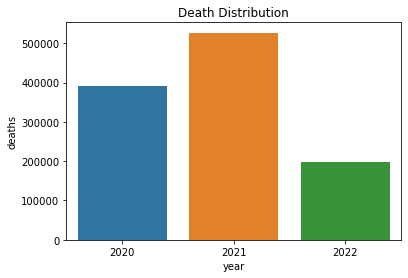

In [13]:
plt.title("Death Distribution")
sns.barplot(x ="year", y="deaths", data=Graph)

### Let's see a graphical relationship between the number of cases and deaths for the three year period

<AxesSubplot:title={'center':'Covid Overview'}, xlabel='deaths', ylabel='cases'>

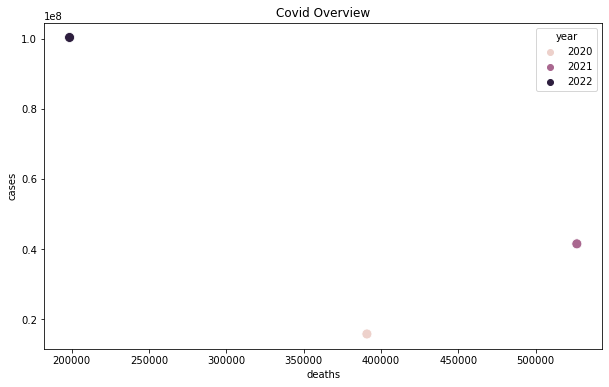

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Covid Overview")
sns.scatterplot(x ="deaths", y="cases", hue="year", s =100, data=Yearly)

### From the data above, we see yearly statistics of the total cases, deaths and death rates in the EU/EEA countries from the year 2020 to 2022. The year 2021 had the highest death rate of 4.6% despite having a lower record of cases compare to the year 2022.  We can also infer that the virus was better handled in the year 2022 despite having the highest recorded cases. The number of deaths and the death rate stands as a proof to this. A good question to ask then would be
### 1. Why was there an overwhelming increase in the recorded cases for the year 2022.
### 2. How were these countries able to lower the rate of deaths despite having a exponential increase in the number of cases? 
### In response to question 1, you may ask could it be that the people present in those countries did not adhere to the lockdown/curfew or did they not employ safety practices such as the usage of nose mask, washing of hands, use of sanitizer? Or were international flights, local travels and crowded meetings allowed during this period? Take a pause for a moment. 
### What comes to mind when we look at question 2, Could it be that international flights into and outside the EU/EEA countries were banned or limited?   Well it is not likely because the number of cases in 2022 is double that of 2021 and almost double the sum of cases recorded in the previous years together. Oh! maybe there was quick response and  good treatments administered to patients immediately after diagnosis?
### Well, none of these questions can be given a definite answer as the data we do have is limited and is a total combination of the Covid-19 statistics for 30 countries altogether. Detailed analysis into individual countries will give us better insight as we go further.



### Let's now take a general look at the statistic as it relates to the individual EU/EEA countries

In [15]:
Overview= Covid.groupby(["countriesAndTerritories", "popData2020"])[["dateRep", "cases", "deaths", "survivors" ]].sum()

In [16]:
Overview['deathRate'] = (Overview.deaths/Overview.cases)*100
Overview['survivors'] = (Overview.cases-Overview.deaths)

In [17]:
Overview

,,cases,deaths,survivors,deathRate
countriesAndTerritories,popData2020,,,,
Austria,8901064,4675532.0,20198.0,4655334.0,0.431994
Belgium,11522440,4368611.0,32089.0,4336522.0,0.734536
Bulgaria,6951482,1189000.0,37300.0,1151700.0,3.137090
Croatia,4058165,1169342.0,16169.0,1153173.0,1.382743
Cyprus,888005,545896.0,1086.0,544810.0,0.198939
Czechia,10693939,3958805.0,40365.0,3918440.0,1.019626
Denmark,5822763,3107633.0,6575.0,3101058.0,0.211576
Estonia,1328976,584489.0,2612.0,581877.0,0.446886
Finland,5525292,1171034.0,5012.0,1166022.0,0.427998


### The overview of the statistics of each countries is useful to derive key insights such as: 
### 1). Top 5 EU countries with the highest cases recorded
### 2). EU Country with the lowest death rate
### 3). Top 10 EEA countries with highest survival rate
### 4). EU Country with the highest number of deaths
### 5). EU Country with the lowest cases recorded
### 6). Top 3 EU Countries with the highest death rate
### 7). EU Country with the lowest number of deaths
### We can calculate an assumed percentage of the affected population for each countries because at first sight, Austria seems to have recorded cases which equals more than half of its total population. This can also provide insights relating to the spread of the virus within each country. 
### Note: we called this "Assumed" because it is over a period of 3years and there could be scenarios were 1 person was diagnosed with the virus more than 1 times over the years

### Our next step will be to calculate the survival rate in each country. This would can be determined by computing the ratio of the number of people who survived after being diagnosed with Covid (survivors) to the number of cases recorded in that country (cases).


In [18]:
#First let us convert the index "popData2020" into a column
New_Overview = Overview.reset_index(level="popData2020")

In [19]:
#To retain the name "Overview", we copy the data from "New_Overview" and assign to "Overview"
Overview = New_Overview.copy()
Overview

,popData2020,cases,deaths,survivors,deathRate
countriesAndTerritories,,,,,
Austria,8901064,4675532.0,20198.0,4655334.0,0.431994
Belgium,11522440,4368611.0,32089.0,4336522.0,0.734536
Bulgaria,6951482,1189000.0,37300.0,1151700.0,3.137090
Croatia,4058165,1169342.0,16169.0,1153173.0,1.382743
Cyprus,888005,545896.0,1086.0,544810.0,0.198939
Czechia,10693939,3958805.0,40365.0,3918440.0,1.019626
Denmark,5822763,3107633.0,6575.0,3101058.0,0.211576
Estonia,1328976,584489.0,2612.0,581877.0,0.446886
Finland,5525292,1171034.0,5012.0,1166022.0,0.427998


### Lets now add key information to our data set

In [20]:
# This lines of code helps us calculate our assumed percentage of affected population and the survival rate for each country in the EU
Overview['AssumedPopAffected']= (Overview.cases/Overview.popData2020)*100
Overview['AssumedSurvRate']= (Overview.survivors/Overview.cases)*100

## The table below gives a comprehensive overview of the Pandemic situation for each country in the EU/EEA

In [21]:
#The data is now set for further analysis. NOte that the deathRate, and Assumed values are all in percentage
Overview

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Austria,8901064,4675532.0,20198.0,4655334.0,0.431994,52.527788,99.568006
Belgium,11522440,4368611.0,32089.0,4336522.0,0.734536,37.913940,99.265464
Bulgaria,6951482,1189000.0,37300.0,1151700.0,3.137090,17.104266,96.862910
Croatia,4058165,1169342.0,16169.0,1153173.0,1.382743,28.814550,98.617257
Cyprus,888005,545896.0,1086.0,544810.0,0.198939,61.474429,99.801061
Czechia,10693939,3958805.0,40365.0,3918440.0,1.019626,37.019147,98.980374
Denmark,5822763,3107633.0,6575.0,3101058.0,0.211576,53.370419,99.788424
Estonia,1328976,584489.0,2612.0,581877.0,0.446886,43.980403,99.553114
Finland,5525292,1171034.0,5012.0,1166022.0,0.427998,21.194065,99.572002


### Let's find out the countries which had 50% percent and above of their population affected by the virus (Shown in the "AssumedPopAffected" column)

In [22]:
Highest_AffPop= Overview.AssumedPopAffected >= 50
High_Low =Overview[Highest_AffPop]
High_Low.sort_values("AssumedPopAffected", ascending=False)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Cyprus,888005,545896.0,1086.0,544810.0,0.198939,61.474429,99.801061
Iceland,364134,200397.0,179.0,200218.0,0.089323,55.033861,99.910677
Denmark,5822763,3107633.0,6575.0,3101058.0,0.211576,53.370419,99.788424
Austria,8901064,4675532.0,20198.0,4655334.0,0.431994,52.527788,99.568006
Portugal,10295909,5294364.0,24474.0,5269890.0,0.462265,51.422016,99.537735
Slovenia,2095861,1063613.0,6668.0,1056945.0,0.626920,50.748261,99.373080


### The results above show Cyprus as the lead with over 61% of its population affected. The graphical representation of the data is shown below

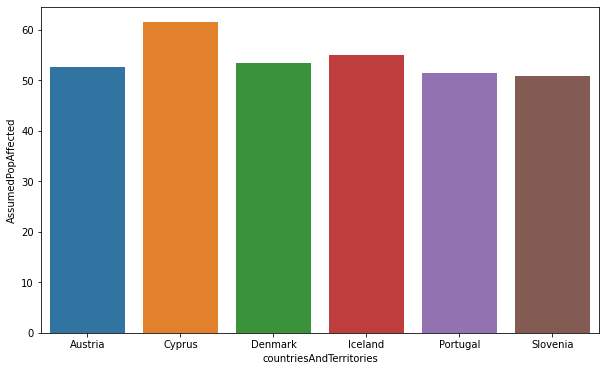

In [23]:
Data1 = High_Low.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x ="countriesAndTerritories", y= "AssumedPopAffected", data = Data1);

## Next: Lets see the Countries with death rate higher than 1%

In [24]:
Overview[Overview.deathRate>1].sort_values("deathRate", ascending=False)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Bulgaria,6951482,1189000.0,37300.0,1151700.0,3.137090,17.104266,96.862910
Hungary,9769526,1951079.0,46736.0,1904343.0,2.395392,19.971071,97.604608
Romania,19328838,2974880.0,65824.0,2909056.0,2.212661,15.390889,97.787339
Poland,37958138,5943544.0,116475.0,5827069.0,1.959689,15.658155,98.040311
Croatia,4058165,1169342.0,16169.0,1153173.0,1.382743,28.814550,98.617257
Czechia,10693939,3958805.0,40365.0,3918440.0,1.019626,37.019147,98.980374


<AxesSubplot:xlabel='countriesAndTerritories', ylabel='deathRate'>

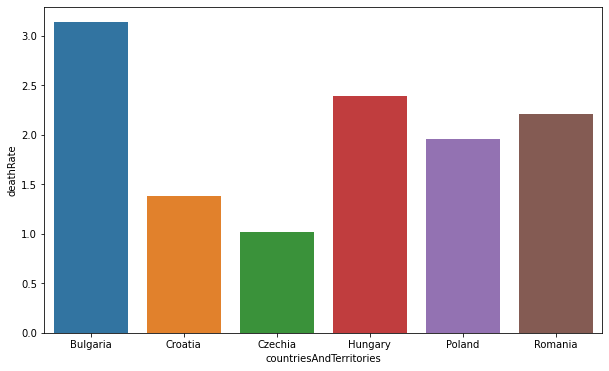

In [25]:
Data2 = Overview[Overview.deathRate>1].reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="countriesAndTerritories", y="deathRate", data= Data2)

## Next: Top 5 EU Countries with the highest number of recorded cases

In [26]:
Highest_No_of_Cases= Overview.sort_values("cases", ascending=False)
Highest_No_of_Cases.head(5)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
France,67320216,33174394.0,150979.0,33023415.0,0.455107,49.278502,99.544893
Germany,83166711,29994093.0,142763.0,29851330.0,0.475970,36.065022,99.524030
Italy,59641488,20299013.0,170213.0,20128800.0,0.838528,34.035055,99.161472
Spain,47332614,13166085.0,109954.0,13056131.0,0.835131,27.816095,99.164869
Netherlands,17407585,8292279.0,22439.0,8269840.0,0.270601,47.636010,99.729399


<AxesSubplot:xlabel='countriesAndTerritories', ylabel='cases'>

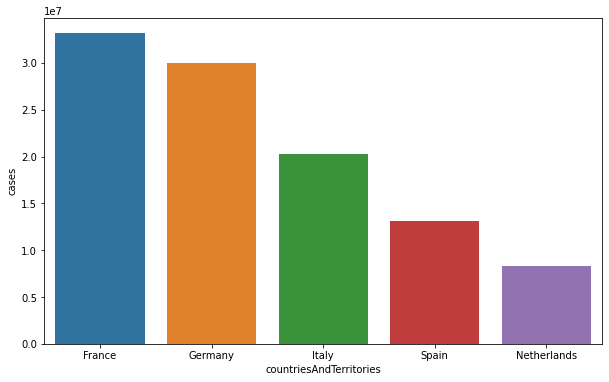

In [27]:
Data3 = Highest_No_of_Cases.head(5).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="countriesAndTerritories", y="cases", data= Data3)

## Top 10 Countries with the lowest number of recorded cases

In [28]:
Lowest_No_of_Cases = Overview.sort_values("cases", ascending=True)
Lowest_No_of_Cases.head(10)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Liechtenstein,38747,18452.0,85.0,18367.0,0.460655,47.621751,99.539345
Malta,514564,111410.0,777.0,110633.0,0.697424,21.651340,99.302576
Iceland,364134,200397.0,179.0,200218.0,0.089323,55.033861,99.910677
Luxembourg,626108,277888.0,1107.0,276781.0,0.398362,44.383397,99.601638
Cyprus,888005,545896.0,1086.0,544810.0,0.198939,61.474429,99.801061
Estonia,1328976,584489.0,2612.0,581877.0,0.446886,43.980403,99.553114
Latvia,1907675,847709.0,5878.0,841831.0,0.693398,44.436762,99.306602
Slovenia,2095861,1063613.0,6668.0,1056945.0,0.626920,50.748261,99.373080
Lithuania,2794090,1166944.0,9185.0,1157759.0,0.787099,41.764725,99.212901


<AxesSubplot:xlabel='cases', ylabel='countriesAndTerritories'>

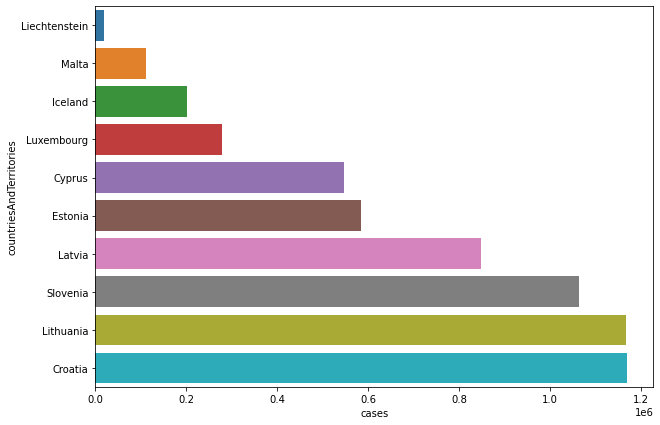

In [29]:
Data4 = Lowest_No_of_Cases.head(10).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="cases", y="countriesAndTerritories", data= Data4)

## Top 5 EU Countries with the lowest number of deaths recorded

In [30]:
Lowest_No_of_Deaths = Overview.sort_values("deaths", ascending=True)
Lowest_No_of_Deaths.head(5)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Liechtenstein,38747,18452.0,85.0,18367.0,0.460655,47.621751,99.539345
Iceland,364134,200397.0,179.0,200218.0,0.089323,55.033861,99.910677
Malta,514564,111410.0,777.0,110633.0,0.697424,21.651340,99.302576
Cyprus,888005,545896.0,1086.0,544810.0,0.198939,61.474429,99.801061
Luxembourg,626108,277888.0,1107.0,276781.0,0.398362,44.383397,99.601638


<AxesSubplot:xlabel='countriesAndTerritories', ylabel='deaths'>

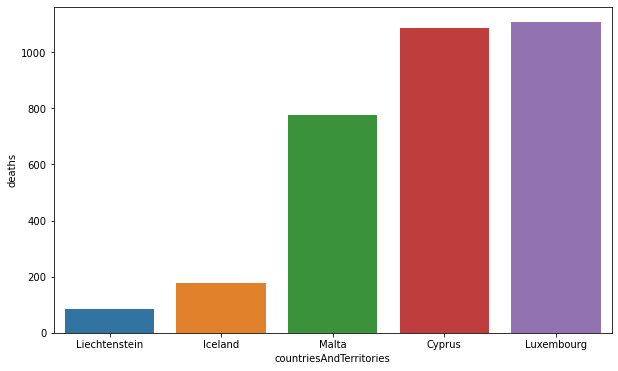

In [31]:
Data5= Lowest_No_of_Deaths.head(5).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="countriesAndTerritories", y="deaths", data=Data5)

## Top 10 EU Countries with the highest number of deaths recorded

In [32]:
Highest_No_of_Deaths = Overview.sort_values("deaths", ascending=False)
Highest_No_of_Deaths.head(10)

,popData2020,cases,deaths,survivors,deathRate,AssumedPopAffected,AssumedSurvRate
countriesAndTerritories,,,,,,,
Italy,59641488,20299013.0,170213.0,20128800.0,0.838528,34.035055,99.161472
France,67320216,33174394.0,150979.0,33023415.0,0.455107,49.278502,99.544893
Germany,83166711,29994093.0,142763.0,29851330.0,0.475970,36.065022,99.524030
Poland,37958138,5943544.0,116475.0,5827069.0,1.959689,15.658155,98.040311
Spain,47332614,13166085.0,109954.0,13056131.0,0.835131,27.816095,99.164869
Romania,19328838,2974880.0,65824.0,2909056.0,2.212661,15.390889,97.787339
Hungary,9769526,1951079.0,46736.0,1904343.0,2.395392,19.971071,97.604608
Czechia,10693939,3958805.0,40365.0,3918440.0,1.019626,37.019147,98.980374
Bulgaria,6951482,1189000.0,37300.0,1151700.0,3.137090,17.104266,96.862910


<AxesSubplot:xlabel='deaths', ylabel='countriesAndTerritories'>

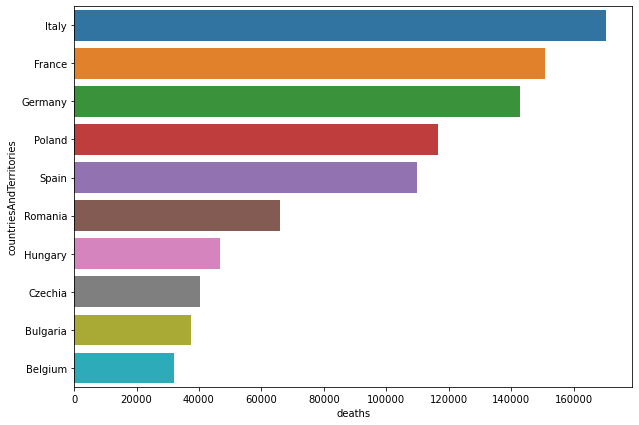

In [33]:
Data6 = Highest_No_of_Deaths.head(10).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="deaths", y="countriesAndTerritories", data=Data6)

## Lets examine the data based on the months. This can give us insight with regards to the time during the year when cases were either higher or lower

In [34]:
Monthly_Data = Covid.groupby("month")[["cases","deaths"]].sum()
Monthly_Data

,cases,deaths
month,,
1,36077119.0,152402.0
2,23884134.0,120026.0
3,23249740.0,136174.0
4,15154163.0,168851.0
5,6720885.0,66031.0
6,7008368.0,25002.0
7,8896350.0,14974.0
8,2475517.0,14786.0
9,2533381.0,38099.0


<AxesSubplot:xlabel='month', ylabel='cases'>

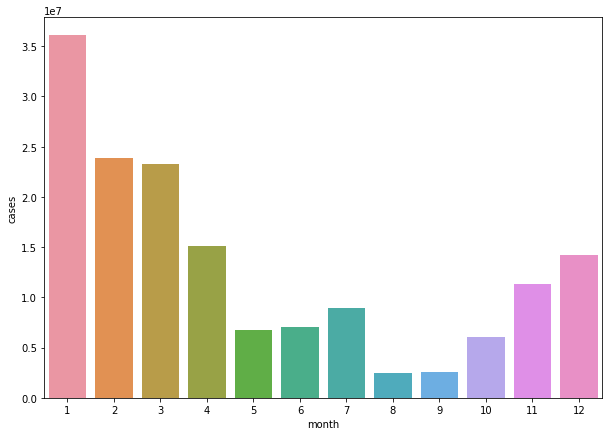

In [35]:
Data7  = Monthly_Data.reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="month", y="cases" , data=Data7)

### The overall monthly data with focus on the cases as shown above, reveals that the first 4 months had the highest number of recorded cases followed by the 12th month of the year. This may be as a result of number of travels that takes place during this time of the year. Further research can yield more insight on that.

### Take a look at the same monthly data below with respect to the number of recorded deaths. We see that the two months (4th and 12th) with the least number of cases among the the top 5 months with highest cases, had the highest number of recorded deaths

<AxesSubplot:xlabel='month', ylabel='deaths'>

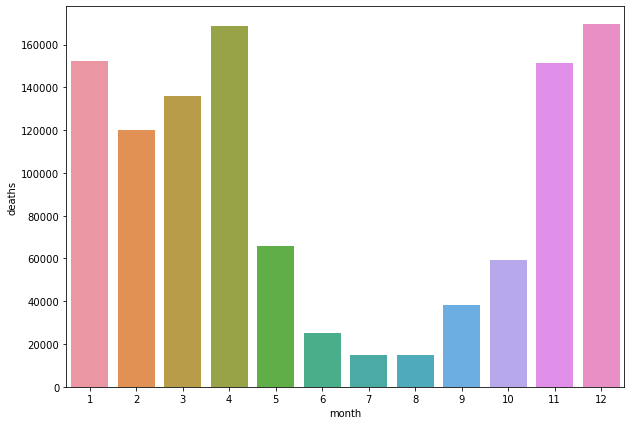

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x="month", y="deaths" , data=Data7)

# Further analysis can be carried out using the monthly data below grouped by countries to investigate individual countries of the EU

In [37]:
Monthly = Covid.groupby(["month", "countriesAndTerritories"])[["cases","deaths"]].sum()
Monthly

cases  deaths
month countriesAndTerritories                   
1     Austria                   662385.0  2233.0
      Belgium                  1148499.0  2320.0
      Bulgaria                  221339.0  3783.0
      Croatia                   243511.0  2396.0
      Cyprus                     98144.0   181.0
...                                  ...     ...
12    Romania                   186125.0  6659.0
      Slovakia                  350979.0  3544.0
      Slovenia                   89358.0  1634.0
      Spain                    1911759.0  7822.0
      Sweden                    322901.0  2787.0

[360 rows x 2 columns]

In [38]:
January=Monthly.reset_index()
January[January.month==1]

,month,countriesAndTerritories,cases,deaths
0,1,Austria,662385.0,2233.0
1,1,Belgium,1148499.0,2320.0
2,1,Bulgaria,221339.0,3783.0
3,1,Croatia,243511.0,2396.0
4,1,Cyprus,98144.0,181.0
5,1,Czechia,817891.0,5891.0
6,1,Denmark,927078.0,1341.0
7,1,Estonia,118122.0,296.0
8,1,Finland,250262.0,657.0
9,1,France,9744625.0,18615.0


## Another insight on the day with the highest record for number cases and deaths can be identified.

In [39]:
Covid.sort_values("cases", ascending=False)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2020,survivors,deathRate%
8011,25/01/2022,25,1,2022,501635.0,467.0,France,FRA,67320216,501168.0,0.093096
8018,18/01/2022,18,1,2022,464769.0,375.0,France,FRA,67320216,464394.0,0.080685
8017,19/01/2022,19,1,2022,436167.0,231.0,France,FRA,67320216,435936.0,0.052961
8010,26/01/2022,26,1,2022,428008.0,258.0,France,FRA,67320216,427750.0,0.060279
8016,20/01/2022,20,1,2022,425183.0,245.0,France,FRA,67320216,424938.0,0.057622
...,...,...,...,...,...,...,...,...,...,...,...
24316,11/04/2022,11,4,2022,NaN,38.0,Spain,ESP,47332614,NaN,NaN
24317,10/04/2022,10,4,2022,NaN,47.0,Spain,ESP,47332614,NaN,NaN
24318,09/04/2022,9,4,2022,NaN,42.0,Spain,ESP,47332614,NaN,NaN
24320,07/04/2022,7,4,2022,NaN,53.0,Spain,ESP,47332614,NaN,NaN


### We see from the data above that France had the highest number of cases recorded in one day and the date was 25th of January 2022

### On the other end below, the data reveals that Greece had the highest number of recorded deaths in one day among all other EU/EEA countries and the date was the 1st of September in the year 2021

In [40]:
Covid.sort_values("deaths", ascending=False)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2020,survivors,deathRate%
9959,01/09/2021,1,9,2021,2868.0,13743.0,Greece,GRC,10718565,-10875.0,479.184100
8673,03/04/2020,3,4,2020,5233.0,2004.0,France,FRA,67320216,3229.0,38.295433
8661,15/04/2020,15,4,2020,2633.0,1438.0,France,FRA,67320216,1195.0,54.614508
8669,07/04/2020,7,4,2020,3777.0,1417.0,France,FRA,67320216,2360.0,37.516548
8667,09/04/2020,9,4,2020,4286.0,1341.0,France,FRA,67320216,2945.0,31.287914
...,...,...,...,...,...,...,...,...,...,...,...
24237,08/03/2020,8,3,2020,5.0,NaN,Slovenia,SVN,2095861,NaN,NaN
24238,07/03/2020,7,3,2020,5.0,NaN,Slovenia,SVN,2095861,NaN,NaN
24239,06/03/2020,6,3,2020,4.0,NaN,Slovenia,SVN,2095861,NaN,NaN
24240,05/03/2020,5,3,2020,5.0,NaN,Slovenia,SVN,2095861,NaN,NaN


## Limitations and Further Study

### We can carry out further study to see the type of vaccines that were available and in use in each of these countries as this can give us insights on reasons for the differences in deaths and cases recorded by each country.

### We can also research further to see if there was adequate resources, facilities and amenities like oxygen and other very important medical equipments for treatment in these countries. As this can reveal deeper understanding of why there are more deaths in one country more than the other or more deaths on a specific day than a whole month combined

# Conclusion

##  The purpose for this analysis is to reveal the extent to which the virus affected the countries in the EU. The rate of spread, the increase in the number of cases and deaths in the EU countries was revealed along the year from 2020 when the pandemic first hit to 2022. The data showed that 2022 had the highest record for number of cases but the least number of deaths. We can conclude that there was availability of effective treatments and care given to patients during the year 2022. 
## Furthermore, countries that were most affected by the virus and countries which had high death rates were also revealed. France topped the list of high record for number of cases, with a record of 33,174,394 cases which is about 49.27% of its total population. Liechtenstein came up as the least with a record 18,452 cases which is 47.62% of its total population. The time of the year when the EU countries had the most number of recorded cases was also revealed with January to April and December topping the list. 
## In addition, the data showed two very crucial days of this pandemic. One is the day with the most recorded cases;France turned out to be the country with such a record, which was on the 25th of January 2022 with a high record of 50,1635 cases. The second day is a single day with the highest record of death; in this case Greece had a tragic record of 13,743.
## We can conclude that these results among others have exposed the degree to which the EU countries were affected by the Covid-19 virus using the statistical data collect from the European Centre for Disease Prevention and Control, an Agency of the European Union 